In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ('Dataset/nyc_jobs.csv')
df.head(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-23T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-23T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-23T00:00:00.000


In [3]:
label=['min_salary','max_salary']
def salary_for_agencies(agency,salary_freq):
    try:
        posting_type_data=data[data['Salary Frequency']==salary_freq]
        agency_data=posting_type_data[posting_type_data['Agency']==agency]
        min_salary=agency_data['Salary Range From']
        max_salary=agency_data['Salary Range To']
        avg_max_salary=sum(max_salary)/len(max_salary)
        print("Count of "+salary_freq+" Job poosition in the agency:",len(max_salary))
        avg_min_salary=sum(min_salary)/len(min_salary)
        print("Minimum Avg salary for agency:",avg_min_salary)
        print("Maximum Avg salary for agency:",avg_max_salary)
        plt.bar(label,[avg_min_salary,avg_max_salary])
        plt.title("Average Min Max "+salary_freq+" Salary for "+agency)
        plt.show()
    except:
        print("No data")

In [4]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn import preprocessing

In [5]:
data = df

In [6]:
data=data.dropna(subset = ['Job Category'])
print(data.shape)
data.head()

(3026, 28)


,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-23T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-23T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-23T00:00:00.000
5,133921,NYC HOUSING AUTHORITY,External,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-07-23T00:00:00.000
6,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,NaN,Apply online with a cover letter to https://a1...,NaN,"42-09 28th Street, Long Island City, NY",NaN,New York City residency is generally required ...,2013-12-09T00:00:00.000,NaN,2013-12-09T00:00:00.000,2019-07-23T00:00:00.000


In [7]:
X_temp = data.iloc[:,[1,2,4,5,7,12]]
y = data.iloc[:,[10,11]]

X=X_temp.apply(preprocessing.LabelEncoder().fit_transform)

In [8]:
X.head()

,Agency,Posting Type,Business Title,Civil Service Title,Level,Salary Frequency
2,41,0,798,224,0,0
3,41,1,798,224,0,0
4,41,1,1213,237,0,2
5,41,0,1213,237,0,2
6,21,1,357,245,5,0


In [9]:
X['# Of Positions']=data.iloc[:,3]

print(X.shape)
X.head()

(3026, 7)


,Agency,Posting Type,Business Title,Civil Service Title,Level,Salary Frequency,# Of Positions
2,41,0,798,224,0,0,52
3,41,1,798,224,0,0,52
4,41,1,1213,237,0,2,50
5,41,0,1213,237,0,2,50
6,21,1,357,245,5,0,1


C:\Users\Vijai\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


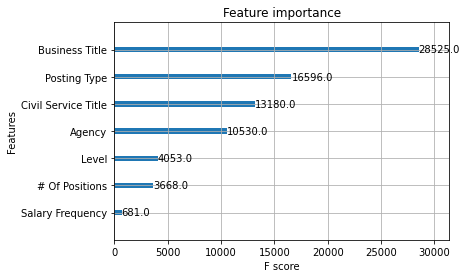

In [10]:
model = XGBClassifier()
model.fit(X, y.iloc[:,0])
# plot feature importance
plot_importance(model)
pyplot.show()